In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Set the image size and batch size
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Load images and labels from the 'train' folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in ['Closed_Eyes', 'Open_Eyes']:
        class_folder = os.path.join(folder, subfolder)
        label = 0 if subfolder == 'Closed_Eyes' else 1
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load the dataset from the 'train' folder
X, y = load_images_from_folder('train')

# Normalize the pixel values
X = X / 255.0

# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for the validation set
val_datagen = ImageDataGenerator()

# Prepare the augmented training data generator
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

# Prepare the validation data generator
validation_generator = val_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)

# Build the fine-tuned CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2 (Output Layer)
model.add(Dense(1, activation='sigmoid'))  # Binary classification for open/closed eyes

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model checkpoint to save the best model during training (using .keras extension)
checkpoint = tf.keras.callbacks.ModelCheckpoint('drowsiness_detection_model_augmented.keras', 
                                                monitor='val_accuracy', 
                                                save_best_only=True, 
                                                mode='max')

# Train the model with augmented data
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Save the final model after training as .keras
model.save('drowsiness_detection_model_final.keras')

# Optionally save the model in .h5 format
model.save('drowsiness_detection_model_final.h5')

C:\Users\YASHRAJ MISHRA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15


C:\Users\YASHRAJ MISHRA\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.6970 - loss: 0.5288 - val_accuracy: 0.9712 - val_loss: 0.1086
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9196 - loss: 0.1915 - val_accuracy: 0.9850 - val_loss: 0.0403
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9584 - loss: 0.1068 - val_accuracy: 0.9950 - val_loss: 0.0158
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9771 - loss: 0.0569 - val_accuracy: 0.9975 - val_loss: 0.0080
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9866 - loss: 0.0419 - val_accuracy: 0.9987 - val_loss: 0.0039
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9924 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9876 - loss: 0.0379 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9771 - loss: 0.0801 - val_accuracy: 0.99

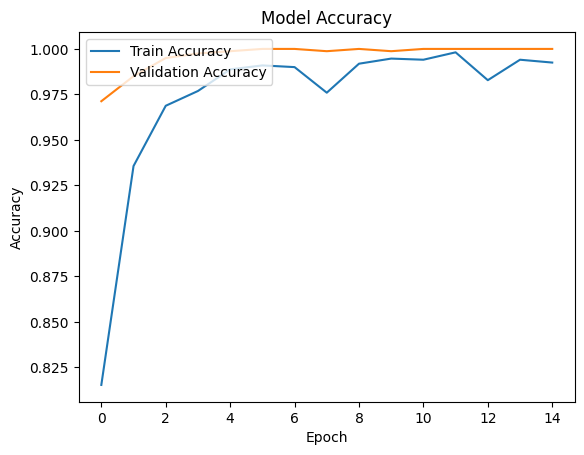

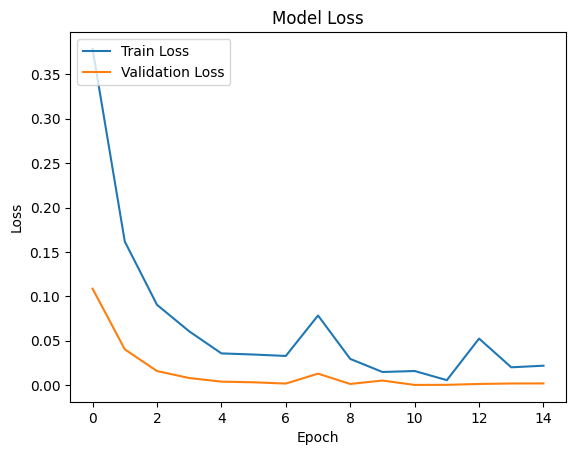

In [5]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()